<a href="https://colab.research.google.com/github/Leonardodarienzo/verifiche-corrette/blob/main/CorrezzioneVerifica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. caricare le informazioni presenti nei file allegati in opportuni geodataframe (areesosta, quartieri) e visualizzarle. Analizzare nel dettaglio le infomrazioni presenti prima di continuare con gli esercizi

In [ ]:
!pip install geopandas

In [3]:
import geopandas

In [ ]:
areesosta = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/DARIENZO LEONARDO - bike_areesosta")
areesosta

In [12]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm")
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


2. visualizzare la mappa di Milano con le aree di sosta

In [ ]:
!pip install contextily
import contextily

In [ ]:
quartieri.crs

In [ ]:
quartieri3857 = quartieri.to_crs(epsg=3857)
quartieri3857

In [ ]:
areesosta.crs

In [ ]:
areesosta3857 = areesosta.to_crs(epsg=3857)
areesosta3857

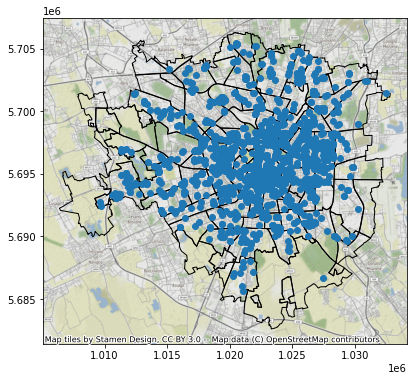

In [11]:
ax = quartieri3857.plot(figsize = (12,6),facecolor = 'none', edgecolor = 'black')
areesosta3857.plot(ax=ax)
contextily.add_basemap(ax)

3. visualizzare il numero di aree di sosta presenti in un quartiere inserito dall'utente. Controllare che il quartiere sia effettivamente presente. 

In [17]:
quartiereutente = input("inserire il Quartiere")
quartieriricerca = quartieri[quartieri.NIL == quartiereutente]
areedisostaQuartieri = areesosta[areesosta.intersects(quartieriricerca.geometry.item())]
len(areedisostaQuartieri)

inserire il QuartiereBICOCCA


20

4. aggiungere al geodataframe delle aree di sosta anche le informazioni del quartiere in cui si trovano

In [ ]:
joined = geopandas.sjoin(areesosta3857, quartieri3857, predicate='intersects', how='left')
joined

5. visualizzare il numero di aree di sosta per ogni quartiere. Ordinare in ordine decrescente sul numero di aree di sosta

In [ ]:
areedisostaxQuartieri = areedisostaQuartieri.groupby("NIL")

6. visualizzare i quartieri in cui non ci sono aree di sosta;

7. visualizzare una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

8. visualizzare il/i quartiere/i con più aree di sosta

9. visualizzare una mappa del quartiere con più aree di sosta con anche le aree di sosta di quel quartiere

10. visualizzare i quartieri che hanno un numero di aree di sosta minori della media;

11. visualizzare una mappa di Milano con l'indicazione delle aree di sosta presenti nei quartieri trovati nell'esercizio precedente

12. visualizzare una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;

13. dato un punto della città (inserito sottoforma di coordinate geografiche dall'utente), visualizzare l'elenco di tutte le aree di sosta a meno di 500 m da quel punto.

14. Visualizzare su una mappa le informazioni dell'esercizio precedente: il punto (colore rosso) e le stazioni (colore nero). E' probabile che sia necessario cambiare il provider di contextily

15. visualizzare le stesse informazioni dell'esercizio precedente aggiungendo una circonferenza di raggio 500 m centrata sul punto inserito dall'utente 